In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import pickle
import xgboost as xgb

/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open('output/2/train.pickle', 'rb') as f:
    train = pickle.load(f)

In [3]:
print(train.data.shape, train.target.shape, train.target.mean())

(10444, 146) (10444,) 0.5


In [4]:
tuner = RandomizedSearchCV(xgb.XGBClassifier(n_estimators=100), {
    'max_depth': [2, 3, 4, 5],
    'gamma': [0, 1, 2, 3, 5, 10, 20],
    'min_child_weight': [0, 1, 2, 3, 5, 10, 20],
}, scoring='roc_auc', n_iter=30, refit=False, verbose=5)
tuner.fit(train.data, train.target)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] min_child_weight=20, gamma=5, max_depth=2 .......................
[CV]  min_child_weight=20, gamma=5, max_depth=2, score=0.722017, total=   1.2s
[CV] min_child_weight=20, gamma=5, max_depth=2 .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  min_child_weight=20, gamma=5, max_depth=2, score=0.705278, total=   1.2s
[CV] min_child_weight=20, gamma=5, max_depth=2 .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  min_child_weight=20, gamma=5, max_depth=2, score=0.713571, total=   1.2s
[CV] min_child_weight=20, gamma=5, max_depth=4 .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV]  min_child_weight=20, gamma=5, max_depth=4, score=0.731052, total=   2.2s
[CV] min_child_weight=20, gamma=5, max_depth=4 .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


[CV]  min_child_weight=20, gamma=5, max_depth=4, score=0.709989, total=   2.2s
[CV] min_child_weight=20, gamma=5, max_depth=4 .......................
[CV]  min_child_weight=20, gamma=5, max_depth=4, score=0.720605, total=   2.2s
[CV] min_child_weight=1, gamma=5, max_depth=2 ........................
[CV]  min_child_weight=1, gamma=5, max_depth=2, score=0.722747, total=   1.2s
[CV] min_child_weight=1, gamma=5, max_depth=2 ........................
[CV]  min_child_weight=1, gamma=5, max_depth=2, score=0.707176, total=   1.2s
[CV] min_child_weight=1, gamma=5, max_depth=2 ........................
[CV]  min_child_weight=1, gamma=5, max_depth=2, score=0.714346, total=   1.2s
[CV] min_child_weight=1, gamma=1, max_depth=5 ........................
[CV]  min_child_weight=1, gamma=1, max_depth=5, score=0.738309, total=   2.8s
[CV] min_child_weight=1, gamma=1, max_depth=5 ........................
[CV]  min_child_weight=1, gamma=1, max_depth=5, score=0.716231, total=   2.8s
[CV] min_child_weight=1, g

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'min_child_weight': [0, 1, 2, 3, 5, 10, 20], 'gamma': [0, 1, 2, 3, 5, 10, 20], 'max_depth': [2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=False,
          return_train_score=True, scoring='roc_auc', verbose=5)

In [5]:
tuner.best_score_, tuner.best_params_

(0.72712990156195811, {'gamma': 3, 'max_depth': 5, 'min_child_weight': 5})

In [6]:
model = xgb.XGBClassifier(**tuner.best_params_)
X_train, X_val, y_train, y_val = train_test_split(train.data, train.target, test_size=1000)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='error')

[0]	validation_0-error:0.364888	validation_1-error:0.374
[1]	validation_0-error:0.357264	validation_1-error:0.354
[2]	validation_0-error:0.351864	validation_1-error:0.353
[3]	validation_0-error:0.353875	validation_1-error:0.353
[4]	validation_0-error:0.350169	validation_1-error:0.348
[5]	validation_0-error:0.34784	validation_1-error:0.345
[6]	validation_0-error:0.346675	validation_1-error:0.347
[7]	validation_0-error:0.341063	validation_1-error:0.351
[8]	validation_0-error:0.341275	validation_1-error:0.354
[9]	validation_0-error:0.339475	validation_1-error:0.356
[10]	validation_0-error:0.336192	validation_1-error:0.348
[11]	validation_0-error:0.334816	validation_1-error:0.346
[12]	validation_0-error:0.332486	validation_1-error:0.339
[13]	validation_0-error:0.330051	validation_1-error:0.345
[14]	validation_0-error:0.329733	validation_1-error:0.343
[15]	validation_0-error:0.326662	validation_1-error:0.338
[16]	validation_0-error:0.326133	validation_1-error:0.335
[17]	validation_0-error:0

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=3, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

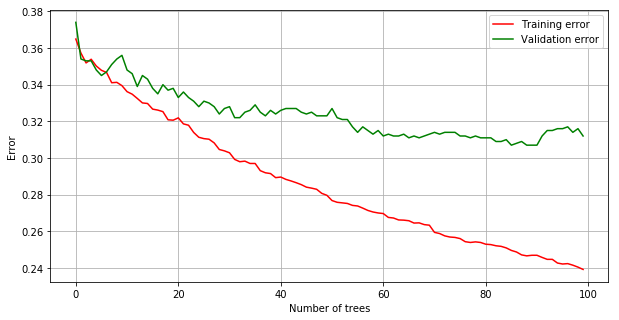

In [7]:
def plot_error(model):
    plt.figure(figsize=(10, 5))
    plt.plot(model.evals_result_['validation_0']['error'], c='r', label='Training error')
    if 'validation_1' in model.evals_result_:
        plt.plot(model.evals_result_['validation_1']['error'], c='g', label='Validation error')
    plt.xlabel('Number of trees')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

plot_error(model)

training accuracy: 0.761
             precision    recall  f1-score   support

          0       0.77      0.73      0.75      4696
          1       0.75      0.79      0.77      4748

avg / total       0.76      0.76      0.76      9444



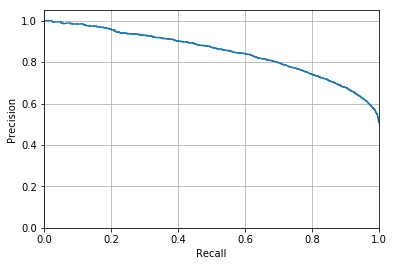

validation accuracy: 0.688
             precision    recall  f1-score   support

          0       0.71      0.68      0.70       526
          1       0.66      0.69      0.68       474

avg / total       0.69      0.69      0.69      1000



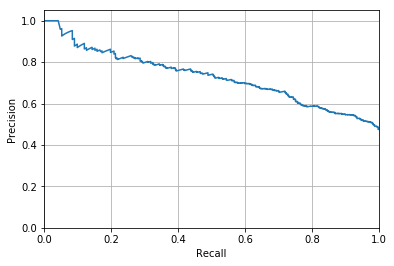

In [8]:
def plot_precision_recall(y_true, y_probas):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probas[:, 1])
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.grid()

def report(name, y_true, y_probas):
    y_pred = np.argmax(y_probas, axis=1)
    print('{} accuracy: {:.3f}'.format(name, accuracy_score(y_true, y_pred)))
    print(classification_report(y_true, y_pred))
    plot_precision_recall(y_true, y_probas)
    plt.show()

report('training', y_train, model.predict_proba(X_train))
report('validation', y_val, model.predict_proba(X_val))

In [9]:
feature_importances = pd.DataFrame(list(zip(train.feature_names, model.feature_importances_ * 100)))
feature_importances.rename(columns={0: 'Feature', 1: 'Importance'}, inplace=True)
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,Violations20,5.319823
4,Violations1000,4.876504
0,X,4.369854
1,Y,3.989867
76,Fraud1000,3.673211
73,Burglary1000,3.356555
72,AggravatedAssault1000,2.849905
75,DrivingOnSuspended1000,2.849905
70,Larceny1000,2.723243
71,DamageToProperty1000,2.723243


# Simple neural network

In [10]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=[300, 300, 300],
    learning_rate='adaptive',
    validation_fraction=0.2,
    verbose=True,
)
nn.fit(train.data, train.target)

Iteration 1, loss = 7.55235244
Iteration 2, loss = 4.14862016
Iteration 3, loss = 3.54759473
Iteration 4, loss = 2.48671470
Iteration 5, loss = 2.52352492
Iteration 6, loss = 2.04314345
Iteration 7, loss = 1.94013903
Iteration 8, loss = 1.48453484
Iteration 9, loss = 1.22954690
Iteration 10, loss = 1.06720985
Iteration 11, loss = 0.92687538
Iteration 12, loss = 0.99997728
Iteration 13, loss = 1.00034795
Iteration 14, loss = 0.89904655
Iteration 15, loss = 0.90816461
Iteration 16, loss = 0.87690709
Iteration 17, loss = 0.81009359
Iteration 18, loss = 0.78054902
Iteration 19, loss = 0.75916855
Iteration 20, loss = 0.78145301
Iteration 21, loss = 0.74369374
Iteration 22, loss = 0.76853151
Iteration 23, loss = 0.74289562
Iteration 24, loss = 0.76248408
Iteration 25, loss = 0.73986909
Iteration 26, loss = 0.71928955
Iteration 27, loss = 0.74902260
Iteration 28, loss = 0.70755327
Iteration 29, loss = 0.73407263
Iteration 30, loss = 0.70895725
Iteration 31, loss = 0.69712325
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[300, 300, 300], learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=True, warm_start=False)

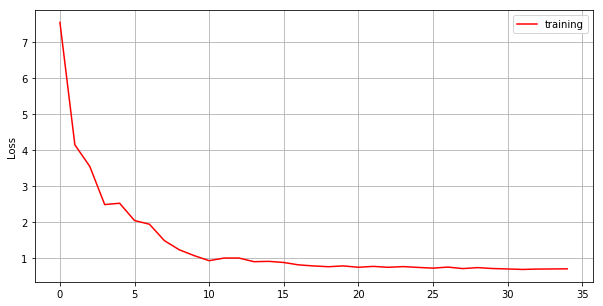

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(nn.loss_curve_, c='r', label='training')
plt.ylabel('Loss')
plt.legend()
plt.grid()

train accuracy: 0.623
             precision    recall  f1-score   support

          0       0.63      0.58      0.61      5222
          1       0.61      0.66      0.64      5222

avg / total       0.62      0.62      0.62     10444



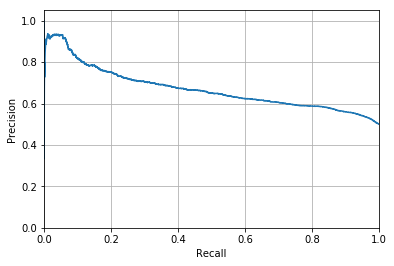

In [12]:
report('train', train.target, nn.predict_proba(train.data))

# Final model

In [13]:
model = xgb.XGBClassifier(**tuner.best_params_)
eval_set = [(train.data, train.target)]
model.fit(train.data, train.target, eval_set=eval_set, eval_metric='error')

[0]	validation_0-error:0.361739
[1]	validation_0-error:0.357239
[2]	validation_0-error:0.356664
[3]	validation_0-error:0.354653
[4]	validation_0-error:0.350919
[5]	validation_0-error:0.349004
[6]	validation_0-error:0.345462
[7]	validation_0-error:0.344791
[8]	validation_0-error:0.341153
[9]	validation_0-error:0.341727
[10]	validation_0-error:0.337802
[11]	validation_0-error:0.33694
[12]	validation_0-error:0.333397
[13]	validation_0-error:0.332918
[14]	validation_0-error:0.329663
[15]	validation_0-error:0.328418
[16]	validation_0-error:0.324971
[17]	validation_0-error:0.321141
[18]	validation_0-error:0.317886
[19]	validation_0-error:0.315396
[20]	validation_0-error:0.316067
[21]	validation_0-error:0.315779
[22]	validation_0-error:0.313577
[23]	validation_0-error:0.313003
[24]	validation_0-error:0.311279
[25]	validation_0-error:0.307258
[26]	validation_0-error:0.306779
[27]	validation_0-error:0.306013
[28]	validation_0-error:0.302566
[29]	validation_0-error:0.30247
[30]	validation_0-erro

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=3, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

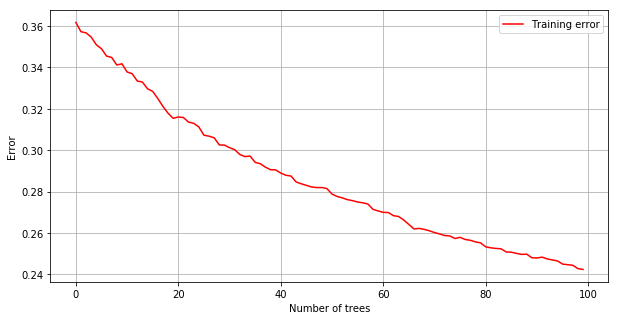

In [14]:
plot_error(model)

(2000, 146) (2000,) 0.5
balanced test accuracy: 0.655
             precision    recall  f1-score   support

          0       0.65      0.66      0.66      1000
          1       0.66      0.65      0.65      1000

avg / total       0.66      0.66      0.66      2000



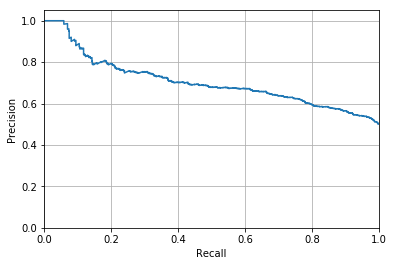

In [15]:
with open('output/2/test_balanced.pickle', 'rb') as f:
    test = pickle.load(f)
print(test.data.shape, test.target.shape, test.target.mean())
report('balanced test', test.target, model.predict_proba(test.data))

In [16]:
ratio1 = 0.0161864681127  # See the output of `train_test_split` in the previous notebook.
ratio0 = 1 - ratio1
index1 = test.target == 1
index0 = ~index1
accuracy1 = accuracy_score(test.target[index1], model.predict(test.data[index1]))
accuracy0 = accuracy_score(test.target[index0], model.predict(test.data[index0]))
print('balanced test accuracy: {:.3f}'.format(accuracy1 * 0.5 + accuracy0 * 0.5))
print('stratified test accuracy: {:.3f}'.format(accuracy1 * ratio1 + accuracy0 * ratio0))

balanced test accuracy: 0.655
stratified test accuracy: 0.664
